# Testing


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import spectrogram, chirp
import sounddevice as sd
import librosa
import os

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets
import IPython.display as ipd

sns.set()
plt.rcParams.update({'font.size': 15})

In [88]:
omega1 = 1
omega2 = 4

samplesPerSecond = 128
duration = 10
totalSamples = int(duration * samplesPerSecond)

t = np.arange(totalSamples) / samplesPerSecond

t1 = t[:totalSamples//2]
t2 = t[totalSamples//2:]


# combine two different signals
signalFirst = 1.0 * np.sin(2 * np.pi * omega1 * t1)
signalSecond = 0.7 * np.sin(2 * np.pi * omega2 * t2)
signal = np.concatenate((signalFirst, signalSecond))

In [89]:
def windowedFT(t, signal, samplesPerSecond, windowPosInSeconds, windowLen):
    """
    Anwendung der Fourier-Transformation auf einen gefensterten Bereich des Signals
    Source: 
    """
    
    signalLen = len(signal)
    windowPos = int(samplesPerSecond * windowPosInSeconds)
    wPadded = np.zeros(signalLen)
    wPadded[windowPos:windowPos + windowLen] = 1 # create window of size windowLin at start pos windowPos
    signal = signal * wPadded
    
    
    plt.figure(figsize=(8, 2))
    
    # plot windowed signal
    plt.subplot(1, 2, 1)
    plt.plot(t, signal, c='k')
    plt.plot(t, wPadded, c='r')
    plt.xlim([min(t), max(t)])
    plt.ylim([-1.1, 1.1])
    plt.xlabel('Time (s)')

    # plot windowed fourier transformed signal
    plt.subplot(1, 2, 2)
    X = np.abs(np.fft.fft(signal)) / samplesPerSecond

    frequency = np.fft.fftfreq(signalLen, d=1/samplesPerSecond)
    X = X[:signalLen//2]
    frequency = frequency[:signalLen//2]
    plt.plot(frequency, X, c='k')
    plt.xlim([0, 7])
    plt.ylim([0, 3])
    
    plt.xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    

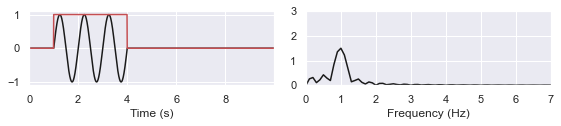

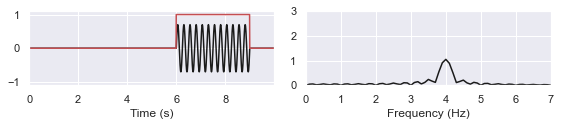

Interaktive Verschiebung der Fensterfunktion: 


interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='Position', max=7.0), Output…

In [91]:
wLen = 3* samplesPerSecond
windowedFT(t, signal, samplesPerSecond, windowPosInSeconds=1, windowLen=wLen)
windowedFT(t, signal, samplesPerSecond,windowPosInSeconds= 6, windowLen=wLen)



print('Interaktive Verschiebung der Fensterfunktion: ')


interact(windowedFT,
         windowPosInSeconds=FloatSlider(min=0, max=duration-(wLen/samplesPerSecond), step=0.1, 
                continuous_update=False, value=2.0, description='Position'),
                t=fixed(t), signal=fixed(signal), samplesPerSecond=fixed(samplesPerSecond), windowLen=fixed(wLen));


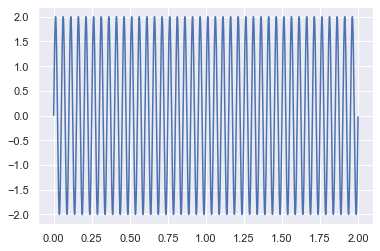

In [93]:
duration = 2
samplesPerSecond = 10025
omega1 = 20

totalSamples = int(duration * samplesPerSecond)
t = np.arange(totalSamples) / samplesPerSecond
signal = 2.0 * np.sin(2 * np.pi * omega1 * t)

plt.plot(t, signal)

In [6]:
Audio(signal, rate=10000)

## Sample Audio

In [95]:
audioTimeSeries, sampleRate = librosa.load("audio/saxo1.wav")

In [96]:
sampleRate # in Hz 

22050

## STFT

In [97]:
windowLen = 4096  # smaller values improve the temporal resolution of the STFT -> tradoff between time and frequency resolution
hopLen = 512

X = librosa.stft(audioTimeSeries, n_fft=windowLen, hop_length = hopLen)

In [98]:
type(X[0][0]) # two dimensional complex matrix  

numpy.complex64

## Visualiserung

In [99]:
def plotSpectogram(X, sampleRate, hopLen, yAxis="linear"):
    plt.figure(figsize=(18, 5))
    librosa.display.specshow(X, sr = sampleRate, hop_length = hopLen, x_axis = "time", y_axis = yAxis)
    plt.colorbar(format="%+2.f")

 ### Lineare Skalierung

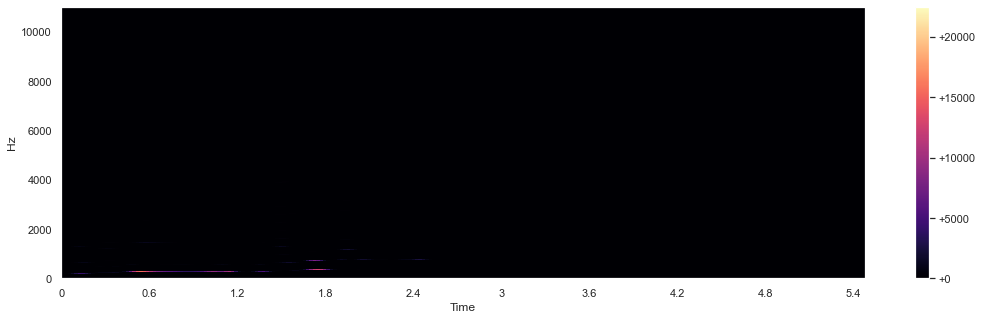

In [101]:
plotSpectogram(abs(X)**2, sampleRate, hopLen) 

### Logarithische Skalierung

In [102]:
Xlog = librosa.power_to_db(abs(X)**2)

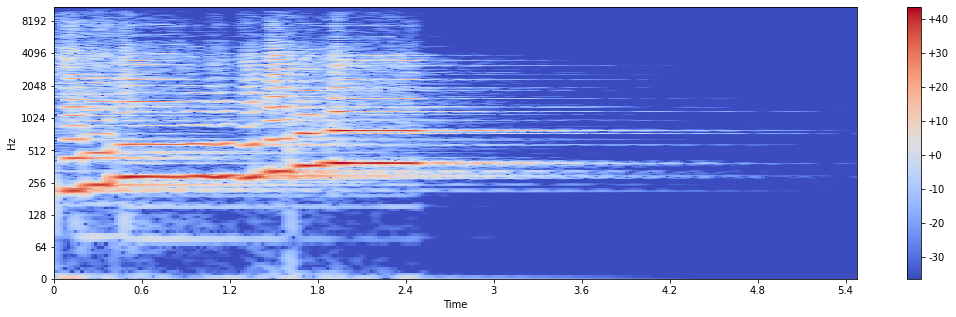

In [81]:
plotSpectogram(Xlog, sampleRate, hopLen, "log") # logarithmic scaling of y-Axis

In [26]:
Audio('audio/saxo1.wav') # load a local WAV file